In [9]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
from logger import Mylogger


In [10]:
#四类数据的提取
log_data = event_accumulator.EventAccumulator(
    r'C:\Users\95397\Desktop\Github代码\Multiagent\models\MAAC_data\run26\logs\events.out.tfevents.1626829979.DESKTOP-VN1HGTT')

log_data.Reload()
# print(log_data.scalars.Keys())
MAAC_reward = log_data.scalars.Items('mean_episode_rewards') 
print(len(MAAC_reward))

3080


In [11]:
No_attention_log_data = event_accumulator.EventAccumulator(
    r'C:\Users\95397\Desktop\Github代码\Multiagent\models\MAAC_data_no_attention\run9\logs\events.out.tfevents.1626830162.DESKTOP-VN1HGTT')
No_attention_log_data.Reload()
MAAC_no_attention_reward = No_attention_log_data.scalars.Items('mean_episode_rewards') 
print(len(MAAC_no_attention_reward))

3004


In [12]:
MADDPG_log_data = event_accumulator.EventAccumulator(
    r'C:\Users\95397\Desktop\Github代码\Multiagent\models\MADDPG_data\run19\logs\events.out.tfevents.1626766992.DESKTOP-VN1HGTT')
MADDPG_log_data.Reload()
MADDPG_reward = MADDPG_log_data.scalars.Items('mean_episode_rewards') 
print(len(MADDPG_reward))

5584


In [29]:
DDPG_log_data = event_accumulator.EventAccumulator(
    r'C:\Users\95397\Desktop\Github代码\Multiagent\models\DDPG_data\run32\logs\events.out.tfevents.1626869377.DESKTOP-VN1HGTT')
DDPG_log_data.Reload()
print(DDPG_log_data.scalars.Keys())
DDPG_reward = DDPG_log_data.scalars.Items('mean_episode_rewards') 
print(len(DDPG_reward))

['mean_episode_rewards']
3000


In [30]:
print(DDPG_reward[-1])
print(MAAC_reward[-1])
print(MAAC_no_attention_reward[-1])
print(MADDPG_reward[-1])

ScalarEvent(wall_time=1626870009.6048868, step=3000, value=628.4000244140625)
ScalarEvent(wall_time=1626838495.1049721, step=3742, value=1879.550048828125)
ScalarEvent(wall_time=1626838519.8283238, step=3986, value=1840.9599609375)
ScalarEvent(wall_time=1626787498.2302759, step=10129, value=876.52001953125)


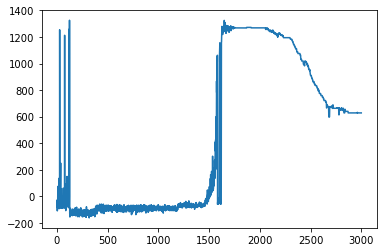

In [31]:
plt.plot([i.step  for i in DDPG_reward], [i.value for i in DDPG_reward], label = 'DDPG')
plt.show()

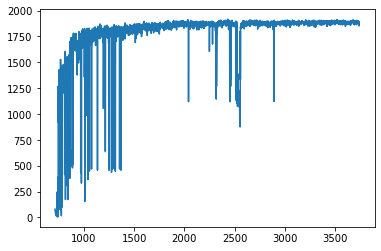

In [16]:
plt.plot([i.step  for i in MAAC_reward if i.step > 700], [i.value for i in MAAC_reward if i.step > 700], label = 'MAAC')
plt.show()

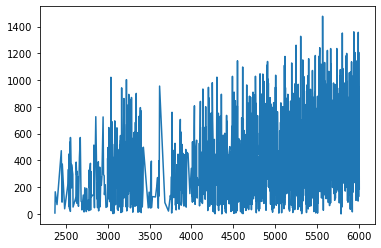

In [17]:
plt.plot([i.step for i in MADDPG_reward if i.step>2300 and i.step < 6000], [i.value for i in MADDPG_reward if i.step>2300 and i.step < 6000], label = 'MADDPG')
plt.show()

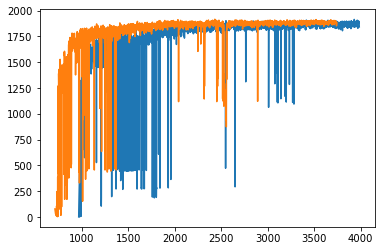

In [34]:
plt.plot([i.step  for i in MAAC_no_attention_reward if i.step > 900], [i.value for i in MAAC_no_attention_reward if i.step > 900], label = 'MAAC_no_attention')
plt.plot([i.step  for i in MAAC_reward if i.step > 700], [i.value for i in MAAC_reward if i.step > 700], label = 'MAAC')

plt.showshow()

In [36]:
Log = Mylogger("show_data")
# i=0-3000
MAAC_no_attention_list = [i.value for i in MAAC_no_attention_reward if i.step > 900]
MAAC_list = [i.value for i in MAAC_reward if (i.step > 700 and i.step < 2300)or (i.step > 2300 and i.value > 1400)]
MADDPG_list = [i.value for i in MADDPG_reward if (i.step > 5000 and i.step < 6500) or (i.step > 6500 and i.value > 500)]
DDPG_list = [i.value for i in DDPG_reward if (i.step > 200 and i.step < 2000)]
for _ in range(1300):DDPG_list.append(DDPG_list[-1])
for i in range(min(len(MAAC_list), len(MAAC_no_attention_list), len(MADDPG_list), len(DDPG_list))):
    Log.logger.add_scalars("mean_episode_rewards", {"MAAC":MAAC_list[i],
                                    "MAAC_no_attention":MAAC_no_attention_list[i],
                                    "MADDPG":MADDPG_list[i],
                                    "DDPG":DDPG_list[i]}, i)


In [39]:
import pandas as pd
import numpy as np

step = min(len(MAAC_list), len(MAAC_no_attention_list), len(MADDPG_list), len(DDPG_list))
name = ["step","MAAC","MAAC_no_attention","MADDPG_list","DDPG_list"]
steps = [i for i in range(step)]
data_value = np.array([steps, MAAC_list[:step],MAAC_no_attention_list[:step],MADDPG_list[:step],DDPG_list[:step]])
data = pd.DataFrame(columns=name, data=data_value.transpose())
data.to_csv('C:/Users/95397/Desktop/Github代码/Multiagent/models/show_data/data.csv')
